# Exercise 6 

Authors: Joseph Weibel, Rebecka Fahrni 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1a
Implementing PCA

In [2]:
def decompose(data, n):
	# standardise data
	data = data - data.mean(axis=0)

	# calculate covariance matrix
	cov = np.cov(data, rowvar=False)

	# calculate eigenvalues and eigenvectors
	eig_vals, eig_vecs = np.linalg.eigh(cov)

	# sort eigenvalues and eigenvectors
	idx = np.argsort(eig_vals)[::-1] # descending
	eig_vals = eig_vals[idx]
	eig_vecs = eig_vecs[:, idx]

	# calculate explained variance
	exp_variance_ratios = eig_vals / eig_vals.sum()

	# reduce dimensionality
	eig_vecs = eig_vecs[:, 0:n]

	# transform data
	data_reduced = (eig_vecs.T @ data.T).T

	return data_reduced, exp_variance_ratios[:n].sum()


## Exercise 1b
find optimal number of principal components

In [3]:
# load data
data = np.load('data/iEEG_subject1.npy')

print('number of time samples:', data.shape[0])
print('number of channels:    ', data.shape[1])

number of time samples: 16000
number of channels:     48


In [4]:
n_values = np.arange(1, data.shape[1] + 1)
exp_variances = np.zeros(len(n_values))

# try different values for n
for i, n in enumerate(n_values):
	_, exp_variances[i] = decompose(data, n)

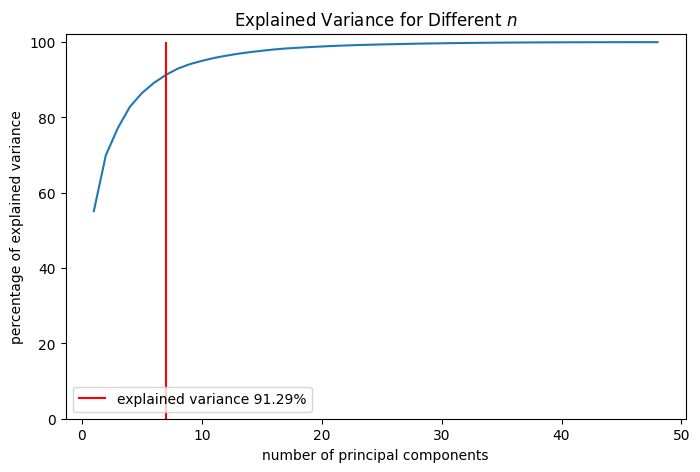

In [5]:
# plot explained variance
optimal_n = 7
plt.figure(figsize=(8, 5))
plt.plot(n_values, exp_variances * 100)
plt.title('Explained Variance for Different $n$')
plt.xlabel('number of principal components')
plt.ylabel('percentage of explained variance')
plt.ylim(0)
plt.vlines(optimal_n, 0, 100, colors='red', label=f'explained variance {(exp_variances[optimal_n - 1] * 100).round(2)}%')
plt.legend()
plt.show()

By using the elbow test, we chose the optimal number of principal components for the decomposition to be $7$ for the iEEG dataset. After seven components, the total explained ratio decreases only slightly and is already over 90 %.

## Exercise 
visualizing PCA results

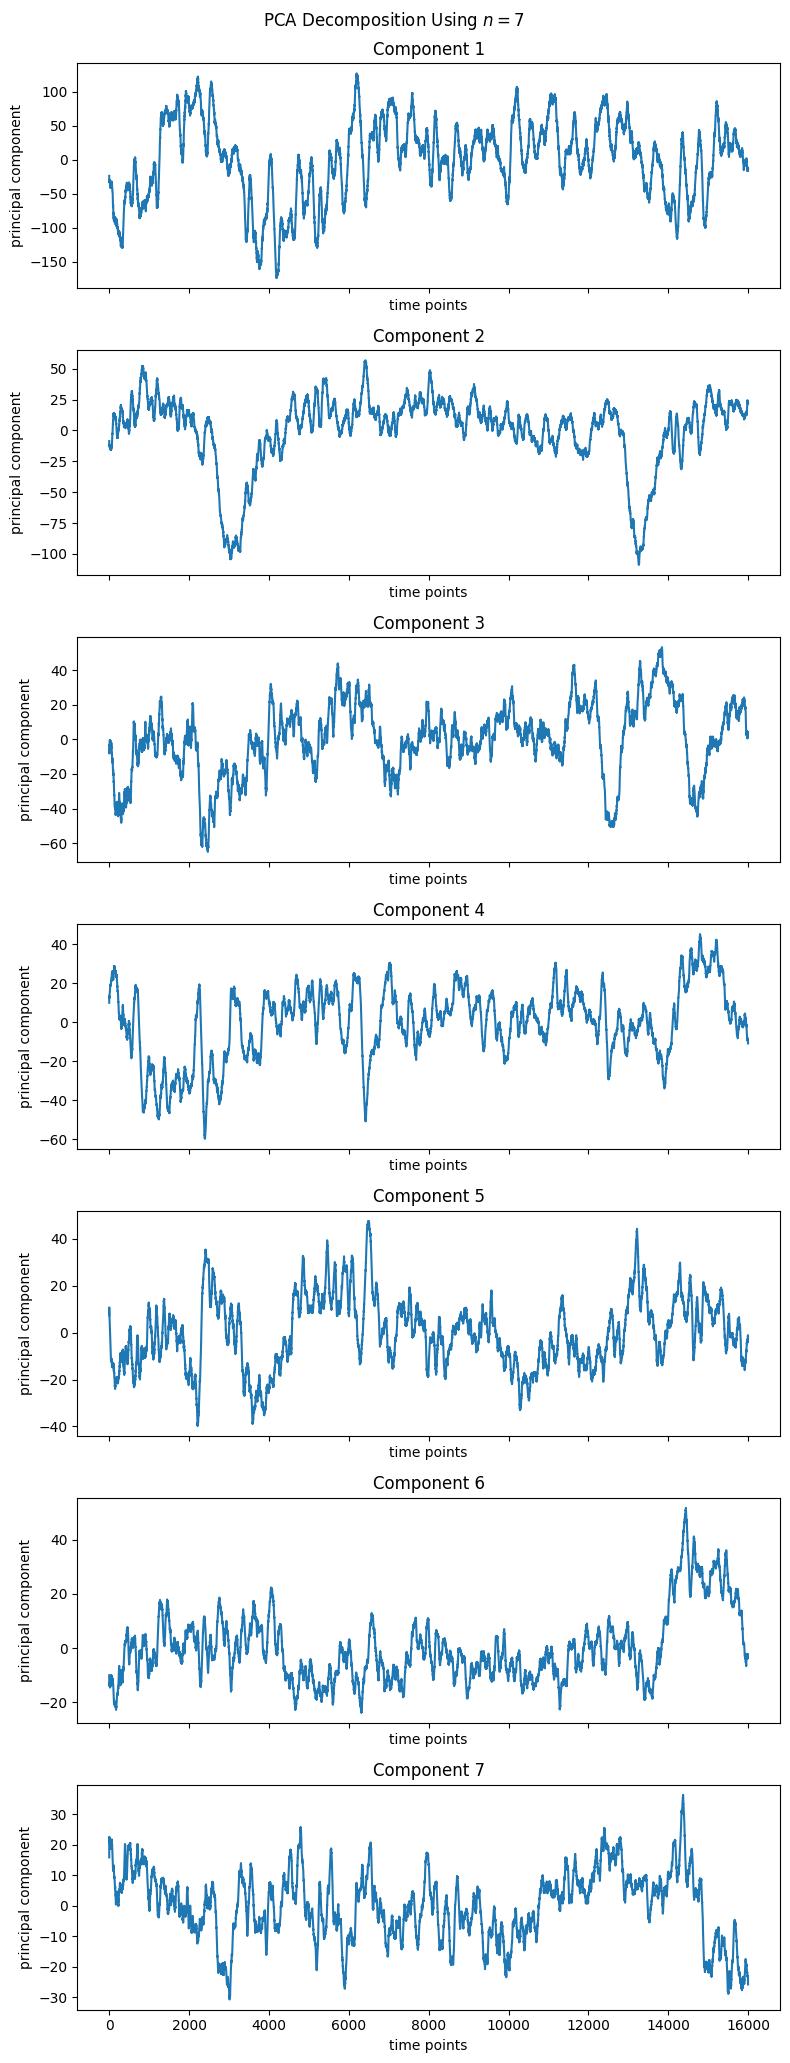

In [6]:
# decompose again with optimal n
reduced_data, _ = decompose(data, optimal_n)

# plot each components individually
fig, axes = plt.subplots(optimal_n, 1, figsize=(8, optimal_n * 3), sharex=True)
for i in range(optimal_n):
	# plot data of component
	axes[i].plot(reduced_data[:, i])

	# add metadata
	axes[i].set_title(f'Component {i + 1}')
	axes[i].set_xlabel('time points')
	axes[i].set_ylabel('principal component')

# add figure metadata
fig.suptitle(f'PCA Decomposition Using $n = {optimal_n}$ \n')
fig.tight_layout()
plt.show()